In [1]:
import pandas as pd

In [2]:
rawData = pd.read_csv('data.csv')

In [3]:
rawData.columns

Index(['result', 'starplayer_difference', 'rpi_rating_difference', 'Log5',
       'adjoe_difference', 'adjde_difference', 'EFG-OEEG',
       'TPP-DTPP_difference', 'SRS_difference', 'SOS_difference',
       ...
       'team2_pt_school_ff', 'team2_pt_school_ncaa', 'team2_pt_school_s16',
       'team2_pt_team_season_losses', 'team2_pt_team_season_wins',
       'team2_rpi_rating', 'team2_score', 'team2_seed.1', 'team2_stlrate',
       'team2_tempo'],
      dtype='object', length=133)

In [4]:
result = rawData['result']
del rawData['result']

# L1-based feature selection

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [6]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(rawData, result)

In [7]:
model = SelectFromModel(lsvc, prefit=True)
data_lsvc = model.transform(rawData)
data_lsvc.shape

(1041, 40)

In [8]:
data_lsvc

array([[ 20.88      ,  13.        ,  35.44409635, ...,  78.        ,
         15.        ,  71.2357    ],
       [ -8.54      , -10.47      ,  48.11783155, ...,  81.        ,
         16.        ,  68.8425    ],
       [ 11.38      ,  12.54      , 165.3757775 , ...,  81.        ,
         14.        ,  63.2345    ],
       ...,
       [ 19.81      ,  11.83      , 148.5604604 , ...,  80.        ,
         13.        ,  70.4393    ],
       [  6.52      ,  -0.85      ,  69.15868716, ...,  71.        ,
          5.        ,  67.853     ],
       [  5.42      ,  -0.54      , -23.21802841, ...,  74.        ,
          9.        ,  69.9367    ]])

In [9]:
df_lsvc= pd.DataFrame(data_lsvc)
df_lsvc.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,20.88,13.00,35.444096,0.0,75.9,66.7,16.93,19.0,72.1,16.0,...,71.2446,98.4183,26.9051,30.8891,63.0,63.0,19.0,78.0,15.0,71.2357
1,-8.54,-10.47,48.117832,5.0,79.8,76.6,-11.28,17.0,68.9,0.0,...,67.7359,96.3688,35.3229,36.6570,18.0,18.0,16.0,81.0,16.0,68.8425
2,11.38,12.54,165.375777,113.0,82.1,77.7,16.93,20.0,60.9,24.5,...,64.7948,96.0965,32.3549,39.4402,52.0,52.0,20.0,81.0,14.0,63.2345
3,-2.09,2.51,-17.569324,1.0,73.5,68.6,13.61,22.0,68.4,0.0,...,70.1299,95.8235,31.4024,30.6634,72.0,20.0,21.0,82.0,8.0,70.3693
4,29.06,14.39,85.009157,41.0,78.2,60.4,12.79,22.0,64.0,27.0,...,65.8612,95.6198,32.0883,38.8068,106.0,106.0,22.0,52.0,16.0,65.0025


In [10]:
df_lsvc.to_csv("df_lsvc.csv",index=True,sep=',')

# Tree-based feature selection

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [12]:
etc = etc.fit(rawData, result)

In [13]:
etc.feature_importances_

array([0.00865498, 0.01125455, 0.02594593, 0.00671169, 0.01129965,
       0.0054165 , 0.00358232, 0.02452163, 0.01244866, 0.010818  ,
       0.03084114, 0.02328479, 0.00563476, 0.00464211, 0.00429224,
       0.00936722, 0.01248293, 0.00568125, 0.004373  , 0.02406558,
       0.0139629 , 0.00359356, 0.00524451, 0.00263152, 0.01103139,
       0.01011391, 0.00390745, 0.00588289, 0.00807712, 0.00572651,
       0.00116311, 0.00531206, 0.00733386, 0.00807888, 0.00285975,
       0.00407894, 0.01634691, 0.02918442, 0.00551673, 0.01628291,
       0.00772514, 0.02266358, 0.00473774, 0.00370291, 0.00585665,
       0.01007843, 0.00729961, 0.00374305, 0.00653496, 0.00601036,
       0.00517228, 0.00441913, 0.00437105, 0.00559737, 0.00534825,
       0.00499572, 0.00503495, 0.00537438, 0.00687224, 0.00313401,
       0.00732966, 0.00502777, 0.00467982, 0.0043294 , 0.00655739,
       0.00475319, 0.00546564, 0.00583386, 0.00508641, 0.00568084,
       0.00355055, 0.00641974, 0.00371682, 0.00408449, 0.00632

In [14]:
model = SelectFromModel(etc, prefit=True)

In [15]:
data_etc = model.transform(rawData)

In [16]:
data_etc.shape 

(1041, 31)

In [17]:
df_etc= pd.DataFrame(data_lsvc)
df_etc.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,20.88,13.00,35.444096,0.0,75.9,66.7,16.93,19.0,72.1,16.0,...,71.2446,98.4183,26.9051,30.8891,63.0,63.0,19.0,78.0,15.0,71.2357
1,-8.54,-10.47,48.117832,5.0,79.8,76.6,-11.28,17.0,68.9,0.0,...,67.7359,96.3688,35.3229,36.6570,18.0,18.0,16.0,81.0,16.0,68.8425
2,11.38,12.54,165.375777,113.0,82.1,77.7,16.93,20.0,60.9,24.5,...,64.7948,96.0965,32.3549,39.4402,52.0,52.0,20.0,81.0,14.0,63.2345
3,-2.09,2.51,-17.569324,1.0,73.5,68.6,13.61,22.0,68.4,0.0,...,70.1299,95.8235,31.4024,30.6634,72.0,20.0,21.0,82.0,8.0,70.3693
4,29.06,14.39,85.009157,41.0,78.2,60.4,12.79,22.0,64.0,27.0,...,65.8612,95.6198,32.0883,38.8068,106.0,106.0,22.0,52.0,16.0,65.0025


In [18]:
df_etc.to_csv("df_etc.csv",index=True,sep=',')

# Pearson correlation linear feature selection

In [19]:
categories = []
categories = rawData.columns

In [20]:
data_pearson = rawData

In [21]:
import scipy
for cat in categories:
    print ('The Pearson correlation between the result and', cat, 
           'is :',scipy.stats.pearsonr(rawData[cat], result))

The Pearson correlation between the result and starplayer_difference is : (0.21612466386621584, 1.811872841276515e-12)
The Pearson correlation between the result and rpi_rating_difference is : (0.31722773737501553, 9.091587363204816e-26)
The Pearson correlation between the result and Log5 is : (0.5210945734318579, 1.5682063939796895e-73)
The Pearson correlation between the result and adjoe_difference is : (0.40941788157318604, 2.4299090910886955e-43)
The Pearson correlation between the result and adjde_difference is : (0.381779225664374, 1.84622520761573e-37)
The Pearson correlation between the result and EFG-OEEG is : (0.30891094647774975, 1.8730223718823385e-24)
The Pearson correlation between the result and TPP-DTPP_difference is : (0.14083456121325466, 5.084917892709922e-06)
The Pearson correlation between the result and SRS_difference is : (0.5433645548622701, 5.167265001526776e-81)
The Pearson correlation between the result and SOS_difference is : (0.47207909858011254, 6.80490214

In [22]:
for cat in categories:
    if scipy.stats.pearsonr(rawData[cat], result)[1]>0.05:
        del data_pearson[cat]
    elif scipy.stats.pearsonr(rawData[cat], result)[0]<0.3:
        del data_pearson[cat]

In [23]:
data_pearson.head()
data_pearson.to_csv("pearson.csv",index=True,sep=',')


# Split data into traning(70%) and testing(30%) 

In [24]:
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

C:\Users\HoddieMelo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
def split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y)
    return X_train, X_test, y_train, y_test

In [26]:
data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test = split(data_pearson,result)

In [27]:
data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test = split(data_etc,result)

In [28]:
data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test = split(data_lsvc,result)

# Define measurement function

In [29]:
def result(predicted_label,true_label):
    true_idx=(predicted_label==true_label)
    false_idx=np.logical_not(true_idx)
    positive_idx=(true_label>0)
    negitive_idx=np.logical_not(positive_idx)
    true_positive=np.sum(np.logical_and(true_idx,positive_idx))
    true_negitive=np.sum(np.logical_and(true_idx,negitive_idx))
    false_positive=np.sum(negitive_idx)-true_negitive
    false_negitive=np.sum(positive_idx)-true_positive
    result = []
    sensitivity = true_positive/(true_positive+false_negitive)
    specificity = true_negitive/(true_negitive+false_positive)
    truePositiveRate = true_positive/(true_positive+false_positive)
    trueNegitiveRate = true_negitive/(false_negitive+true_negitive)
    accuracy = (true_positive+true_negitive)/(true_positive+true_negitive+false_positive+false_negitive)
    performance_evaluation = []
    performance_evaluation.append(sensitivity)
    performance_evaluation.append(specificity)
    performance_evaluation.append(truePositiveRate)
    performance_evaluation.append(trueNegitiveRate)
    performance_evaluation.append(accuracy)
    
    return performance_evaluation

In [30]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

# Model 1: KNN clssifier

In [31]:
def KNeighborsClassifier(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    neigh.predict(X_train)
    neigh.predict(X_test)
    print("training score:",neigh.score(X_train,y_train))
    print("testing score:",neigh.score(X_test,y_test))
    print("result:",result(neigh.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, neigh.predict(X_test)))
    print('training log_loss:',log_loss(y_train,neigh.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,neigh.predict_proba(X_test)))
    mse = mean_squared_error(y_test, neigh.predict(X_test))
    
    return mse


In [32]:
KNN_Pearson_mse = KNeighborsClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)

training score: 0.7664835164835165
testing score: 0.6773162939297125
result: [0.7684210526315789, 0.764367816091954, 0.7807486631016043, 0.751412429378531, 0.7664835164835165]
MSE: 0.3226837060702875
training log_loss: 0.42117197862495837
testing log_loss: 1.301292873866446


In [33]:
KNN_etc_mse = KNeighborsClassifier(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)

training score: 0.8269230769230769
testing score: 0.7252396166134185
result: [0.8078947368421052, 0.8477011494252874, 0.8527777777777777, 0.8016304347826086, 0.8269230769230769]
MSE: 0.2747603833865815
training log_loss: 0.36251873157115627
testing log_loss: 1.6627078604437124


In [34]:
KNN_lsvc_mse = KNeighborsClassifier(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

training score: 0.7431318681318682
testing score: 0.5878594249201278
result: [0.7763157894736842, 0.7068965517241379, 0.743073047858942, 0.743202416918429, 0.7431318681318682]
MSE: 0.41214057507987223
training log_loss: 0.5051867039631579
testing log_loss: 1.9588237631237575


# Model 2: Radom Forest

In [35]:
def RandomForestClassifier(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
    rf.fit(X_train, y_train)
    rf.predict(X_train)
    rf.predict(X_test)
    print("training score:",rf.score(X_train,y_train))
    print("testing score:",rf.score(X_test,y_test))
    print("result:",result(rf.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, rf.predict(X_test)))
    print('training log_loss:',log_loss(y_train,rf.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,rf.predict_proba(X_test)))
    mse = mean_squared_error(y_test, rf.predict(X_test))
    
    return mse


In [36]:
print("The result of Pearson Data")
RF_Pearson_mse = RandomForestClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
RF_etc_mse = RandomForestClassifier(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
RF_lsvc_mse = RandomForestClassifier(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

The result of Pearson Data
training score: 0.8255494505494505
testing score: 0.7795527156549521
result: [0.8263157894736842, 0.8247126436781609, 0.8373333333333334, 0.8130311614730878, 0.8255494505494505]
MSE: 0.22044728434504793
training log_loss: 0.4081105661952143
testing log_loss: 0.47537097285262586
The result of ect Data
training score: 0.8585164835164835
testing score: 0.8083067092651757
result: [0.8789473684210526, 0.8362068965517241, 0.8542199488491049, 0.8635014836795252, 0.8585164835164835]
MSE: 0.19169329073482427
training log_loss: 0.37385757533951064
testing log_loss: 0.4547379928963228
The result of lsvc Data
training score: 0.853021978021978
testing score: 0.7827476038338658
result: [0.8868421052631579, 0.8160919540229885, 0.8403990024937655, 0.8685015290519877, 0.853021978021978]
MSE: 0.21725239616613418
training log_loss: 0.40782846366208525
testing log_loss: 0.472799757196289


# Mode3: Neural_network Multi-layer Perception

In [37]:
def MLPClassifier(X_train, X_test, y_train, y_test):
    from sklearn.neural_network import MLPClassifier
    nn=MLPClassifier(hidden_layer_sizes=(100,10), activation='logistic', solver='sgd',learning_rate='invscaling'
                 ,random_state=20,max_iter=5000)
    nn.fit(X_train, y_train)
    nn.predict(X_train)
    nn.predict(X_test)
    print("training score:",nn.score(X_train,y_train))
    print("testing score:",nn.score(X_test,y_test))
    print("result:",result(nn.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, nn.predict(X_test)))
    print('training log_loss:',log_loss(y_train,nn.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,nn.predict_proba(X_test)))
    
    mse = mean_squared_error(y_test, nn.predict(X_test))
    
    return mse

In [38]:
#MLPClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of Pearson Data")
nn_Pearson_mse = MLPClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
nn_etc_mse = MLPClassifier(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
nn_lsvc_mse = MLPClassifier(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

The result of Pearson Data
training score: 0.521978021978022
testing score: 0.5207667731629393
result: [1.0, 0.0, 0.521978021978022, nan, 0.521978021978022]
MSE: 0.4792332268370607
training log_loss: 0.687656609744579
testing log_loss: 0.6847528795272418
The result of ect Data


C:\Users\HoddieMelo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


training score: 0.521978021978022
testing score: 0.5207667731629393
result: [1.0, 0.0, 0.521978021978022, nan, 0.521978021978022]
MSE: 0.4792332268370607
training log_loss: 0.7659441568913107
testing log_loss: 0.7658827777754338
The result of lsvc Data
training score: 0.521978021978022
testing score: 0.5207667731629393
result: [1.0, 0.0, 0.521978021978022, nan, 0.521978021978022]
MSE: 0.4792332268370607
training log_loss: 0.7568802874976481
testing log_loss: 0.7585014206947011


# Model 4: Logistic Regression

In [39]:
def LogisticRegression_1(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    logit = LogisticRegression()
    logit.fit(X_train,y_train)
    logit.predict(X_train)
    logit.predict(X_test)
    print("training score:",logit.score(X_train,y_train))
    print("testing score:",logit.score(X_test,y_test))
    print("result:",result(logit.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, logit.predict(X_test)))
    print('training log_loss:',log_loss(y_train,logit.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,logit.predict_proba(X_test)))
    
    mse = mean_squared_error(y_test, logit.predict(X_test))
    
    return mse

In [40]:
#LogisticRegression(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of Pearson Data")
logit_Pearson_mse = LogisticRegression_1(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
logit_etc_mse = LogisticRegression_1(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
logit_lsvc_mse = LogisticRegression_1(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

The result of Pearson Data
training score: 0.8035714285714286
testing score: 0.7891373801916933
result: [0.8184210526315789, 0.7873563218390804, 0.8077922077922078, 0.7988338192419825, 0.8035714285714286]
MSE: 0.2108626198083067
training log_loss: 0.42215049796913406
testing log_loss: 0.44884722058904974
The result of ect Data
training score: 0.8681318681318682
testing score: 0.8306709265175719
result: [0.8789473684210526, 0.8563218390804598, 0.8697916666666666, 0.8662790697674418, 0.8681318681318682]
MSE: 0.16932907348242812
training log_loss: 0.3201450208233226
testing log_loss: 0.40821604247027615
The result of lsvc Data
training score: 0.8818681318681318
testing score: 0.8945686900958466
result: [0.8842105263157894, 0.8793103448275862, 0.8888888888888888, 0.8742857142857143, 0.8818681318681318]
MSE: 0.10543130990415335
training log_loss: 0.29506115373942116
testing log_loss: 0.2933194001213286


# Model 5: SVM C-Support Vector Classification

In [41]:
def SVC(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC
    svc = SVC(C=5, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.0001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
    svc.fit(X_train, y_train)
    svc.predict(X_train)
    svc.predict(X_test)
    print("training score:",svc.score(X_train,y_train))
    print("testing score:",svc.score(X_test,y_test))
    print("result:",result(svc.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, svc.predict(X_test)))
    print('training log_loss:',log_loss(y_train,svc.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,svc.predict_proba(X_test)))
    mse = mean_squared_error(y_test, svc.predict(X_test))
    
    return mse

In [42]:
#SVC(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of Pearson Data")
svc_Pearson_mse = SVC(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
svc_etc_mse = SVC(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
svc_lsvc_mse = SVC(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

The result of Pearson Data
training score: 1.0
testing score: 0.5207667731629393
result: [1.0, 1.0, 1.0, 1.0, 1.0]
MSE: 0.4792332268370607
training log_loss: 0.04125171915517444
testing log_loss: 0.6915329958596148
The result of ect Data
training score: 1.0
testing score: 0.5207667731629393
result: [1.0, 1.0, 1.0, 1.0, 1.0]
MSE: 0.4792332268370607
training log_loss: 0.3709927774230758
testing log_loss: 0.6921690744080993
The result of lsvc Data
training score: 1.0
testing score: 0.5207667731629393
result: [1.0, 1.0, 1.0, 1.0, 1.0]
MSE: 0.4792332268370607
training log_loss: 11.491971737475744
testing log_loss: 0.6922881611927871


# Model 6: Naive Bayes

In [43]:
def GaussianNB(X_train, X_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    gnb.predict(X_train)
    gnb.predict(X_test)
    print("training score:",gnb.score(X_train,y_train))
    print("testing score:",gnb.score(X_test,y_test))
    print("result:",result(gnb.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, gnb.predict(X_test)))
    print('training log_loss:',log_loss(y_train,gnb.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,gnb.predict_proba(X_test)))
    mse = mean_squared_error(y_test, gnb.predict(X_test))
    
    return mse


In [44]:
#GaussianNB(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of Pearson Data")
gnb_Pearson_mse = GaussianNB(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
gnb_etc_mse = GaussianNB(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
gnb_lsvc_mse = GaussianNB(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

The result of Pearson Data
training score: 0.7321428571428571
testing score: 0.7699680511182109
result: [0.7210526315789474, 0.7442528735632183, 0.7548209366391184, 0.7095890410958904, 0.7321428571428571]
MSE: 0.23003194888178913
training log_loss: 1.879704943553505
testing log_loss: 1.8194184331370438
The result of ect Data
training score: 0.7623626373626373
testing score: 0.7539936102236422
result: [0.7473684210526316, 0.7787356321839081, 0.7867036011080333, 0.7384196185286104, 0.7623626373626373]
MSE: 0.24600638977635783
training log_loss: 2.2313790765622254
testing log_loss: 2.244029887003495
The result of lsvc Data
training score: 0.7527472527472527
testing score: 0.7476038338658147
result: [0.75, 0.7557471264367817, 0.7702702702702703, 0.7346368715083799, 0.7527472527472527]
MSE: 0.2523961661341853
training log_loss: 1.353727830308674
testing log_loss: 1.4358573926381981


# Model 7: Decision Tree

In [45]:
def tree(X_train, X_test, y_train, y_test):
    from sklearn import tree
    dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None)
    dt = dt.fit(X_train, y_train)
    dt.predict(X_train)
    dt.predict(X_test)
    print("training score:",dt.score(X_train,y_train))
    print("testing score:",dt.score(X_test,y_test))
    print("result:",result(dt.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, dt.predict(X_test)))
    print('training log_loss:',log_loss(y_train,dt.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,dt.predict_proba(X_test)))
    mse = mean_squared_error(y_test, dt.predict(X_test))
    
    return mse

In [46]:
print("The result of Pearson Data")
dt_pearson_mse = tree(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
dt_etc_mse = tree(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
dt_lsvc_mse = tree(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

The result of Pearson Data
training score: 0.7967032967032966
testing score: 0.7476038338658147
result: [0.7710526315789473, 0.8247126436781609, 0.827683615819209, 0.767379679144385, 0.7967032967032966]
MSE: 0.2523961661341853
training log_loss: 0.44970705688636986
testing log_loss: 0.5398952089678061
The result of ect Data
training score: 0.8379120879120879
testing score: 0.744408945686901
result: [0.8578947368421053, 0.8160919540229885, 0.8358974358974359, 0.8402366863905325, 0.8379120879120879]
MSE: 0.25559105431309903
training log_loss: 0.41648400750235975
testing log_loss: 1.010928762766073
The result of lsvc Data
training score: 0.8021978021978022
testing score: 0.731629392971246
result: [0.7763157894736842, 0.8304597701149425, 0.8333333333333334, 0.7727272727272727, 0.8021978021978022]
MSE: 0.268370607028754
training log_loss: 0.4481331498484023
testing log_loss: 0.8671221142963248


# Model 8: Gradient Boosting

In [47]:
def GradientBoostingClassifier(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingClassifier
    gbm = GradientBoostingClassifier(n_estimators=44, min_samples_split=10, min_samples_leaf=5, learning_rate=1.0,max_depth=1, random_state=5)
    gbm = gbm.fit(X_train, y_train)
    gbm.predict_proba(X_train)
    gbm.predict_proba(X_test)
    print("training score:",gbm.score(X_train,y_train))
    print("testing score:",gbm.score(X_test,y_test))
    print("result:",result(gbm.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, gbm.predict(X_test)))
    print('training log_loss:',log_loss(y_train,gbm.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,gbm.predict_proba(X_test)))
    mse = mean_squared_error(y_test, gbm.predict(X_test))
    
    return mse

In [48]:
#GradientBoostingClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
gbm_pearson_mse = GradientBoostingClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test)
print("The result of ect Data")
gbm_etc_mse = GradientBoostingClassifier(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test)
print("The result of lsvc Data")
gbm_lsvc_mse = GradientBoostingClassifier(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test)

training score: 0.8763736263736264
testing score: 0.7731629392971247
result: [0.8947368421052632, 0.8563218390804598, 0.8717948717948718, 0.8816568047337278, 0.8763736263736264]
MSE: 0.2268370607028754
training log_loss: 0.31603304877584854
testing log_loss: 0.5024900516728643
The result of ect Data
training score: 0.9134615384615384
testing score: 0.8146964856230032
result: [0.9157894736842105, 0.9109195402298851, 0.9182058047493403, 0.9083094555873925, 0.9134615384615384]
MSE: 0.1853035143769968
training log_loss: 0.21861404242961702
testing log_loss: 0.462015319969002
The result of lsvc Data
training score: 0.9134615384615384
testing score: 0.8115015974440895
result: [0.9236842105263158, 0.9022988505747126, 0.9116883116883117, 0.9154518950437318, 0.9134615384615384]
MSE: 0.18849840255591055
training log_loss: 0.23580410714902864
testing log_loss: 0.4199448755955126


In [49]:

def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.set(title='Receiver Operating Characteristic',
           xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

# Model Combination: Ensemble Model and Model Evaluation

In [50]:
rawData = pd.read_csv('data.csv')

In [51]:
def VotingClassifier(X_train, X_test, y_train, y_test,logit_weight,rf_weight,gbm_weight,dt_weight,data,rawData):
    from sklearn.ensemble import VotingClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn import tree
    from sklearn.metrics import log_loss
    clf1 = LogisticRegression()
    clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

    clf3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0)
    clf4 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None)
    eclf = VotingClassifier(estimators=[('Logit', clf1), ('RF', clf2), ('GB', clf3),('dr',clf4)], voting='soft', weights=[logit_weight,rf_weight,gbm_weight,dt_weight])

    params = {'RF__max_depth': [3, 5],'GB__n_estimators':[1000,2000]}

    grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
    grid = grid.fit(X_train,y_train)
    warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
    print("training score:",grid.score(X_train,y_train))
    print("testing score:",grid.score(X_test,y_test))
    print("result:",result(grid.predict(X_train),y_train))
    print("MSE:",mean_squared_error(y_test, grid.predict(X_test)))
    print('training log_loss:',log_loss(y_train,grid.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,grid.predict_proba(X_test)))
    predict_proba=grid.predict_proba(data)
    import numpy as np  
    predict_proba = np.delete(predict_proba, -2, axis=1)
    from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    fpr, tpr, thresholds = roc_curve(rawData['result'].values, predict_proba)
    roc_auc = auc(fpr, tpr) 
    plot_roc(fpr, tpr, roc_auc)

The result of Pearson Data
training score: 0.9464285714285714
testing score: 0.7891373801916933
result: [0.9473684210526315, 0.9454022988505747, 0.9498680738786279, 0.9426934097421203, 0.9464285714285714]
MSE: 0.2108626198083067
training log_loss: 0.26317994419184676
testing log_loss: 0.4607473394702372


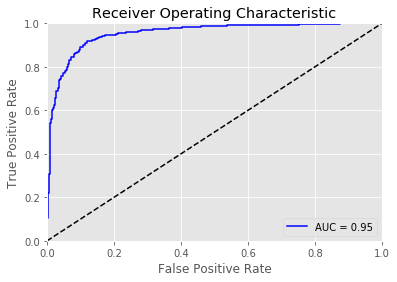

In [52]:
total_pearson_mse = gbm_pearson_mse + dt_pearson_mse + logit_Pearson_mse + RF_Pearson_mse
gbm_pearson_weight = 1-gbm_pearson_mse/total_pearson_mse
dt_pearson_weight = 1-dt_pearson_mse/total_pearson_mse
logit_Pearson_weight = 1-logit_Pearson_mse/total_pearson_mse
RF_Pearson_weight = 1-RF_Pearson_mse/total_pearson_mse
print("The result of Pearson Data")
VotingClassifier(data_pearson_X_train, data_pearson_X_test, data_pearson_y_train, data_pearson_y_test,gbm_pearson_weight,dt_pearson_weight,logit_Pearson_weight,RF_Pearson_weight,data_pearson,rawData)

The result of Etc Data
training score: 0.9285714285714286
testing score: 0.8306709265175719
result: [0.9210526315789473, 0.9367816091954023, 0.9408602150537635, 0.9157303370786517, 0.9285714285714286]
MSE: 0.16932907348242812
training log_loss: 0.23572868567762975
testing log_loss: 0.43079667958344847


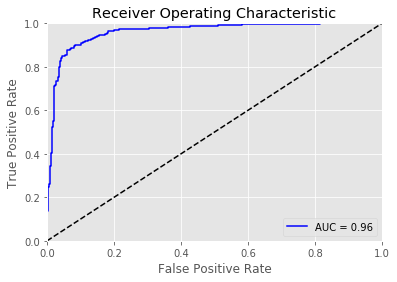

In [53]:
total_etc_mse = gbm_etc_mse + dt_etc_mse + logit_etc_mse + RF_etc_mse
gbm_etc_weight = 1-gbm_etc_mse/total_etc_mse
dt_etc_weight = 1-dt_etc_mse/total_etc_mse
logit_etc_weight = 1-logit_etc_mse/total_etc_mse
RF_etc_weight = 1-RF_etc_mse/total_etc_mse
print("The result of Etc Data")
VotingClassifier(data_etc_X_train, data_etc_X_test, data_etc_y_train, data_etc_y_test,gbm_etc_weight,dt_etc_weight,logit_etc_weight,RF_etc_weight,data_etc,rawData)

The result of Lsvc Data
training score: 0.9697802197802198
testing score: 0.8434504792332268
result: [0.9710526315789474, 0.9683908045977011, 0.9710526315789474, 0.9683908045977011, 0.9697802197802198]
MSE: 0.15654952076677317
training log_loss: 0.20910005932369036
testing log_loss: 0.3677775158389423


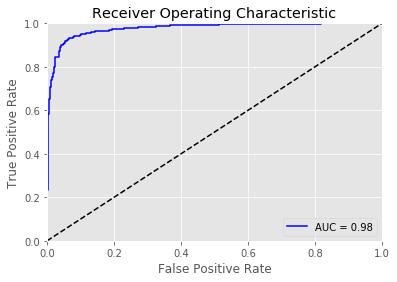

In [54]:
total_lsvc_mse = gbm_lsvc_mse + dt_lsvc_mse + logit_lsvc_mse + RF_lsvc_mse
gbm_lsvc_weight = 1-gbm_lsvc_mse/total_lsvc_mse
dt_lsvc_weight = 1-dt_lsvc_mse/total_lsvc_mse
logit_lsvc_weight = 1-logit_lsvc_mse/total_lsvc_mse
RF_lsvc_weight = 1-RF_lsvc_mse/total_lsvc_mse
print("The result of Lsvc Data")
VotingClassifier(data_lsvc_X_train, data_lsvc_X_test, data_lsvc_y_train, data_lsvc_y_test,gbm_lsvc_weight,dt_lsvc_weight,logit_lsvc_weight,RF_lsvc_weight,data_lsvc,rawData)


# Under this circumstance data selected by LinearSVC has the best preformance
Also,the emsemble model has the best performance compared with any other models